## Problem description

Consider a plate, $\Omega=[0,2]\times [-0.5,0.5]$, with an explicit edge crack, $\Gamma=[0,0.5]\times \{0\}$; that is subjected  to a time dependent crack opening displacement:

\begin{eqnarray}
	\label{eq:surfing_bc}
	\mathbf{u}(x,y,t)= \mathbf{U}(x-\text{v}t,y) \quad \text{on} \quad \partial\Omega_D,
\end{eqnarray}
where $\text{v}$ is an imposed loading velocity; and $\mathbf{U}$ is the asymptotic solution for the Mode-I crack opening displacement
\begin{eqnarray}
	\label{eq:asymptotic}
	U_x= \dfrac{K_I}{2\mu} \sqrt{\dfrac{r}{2\pi}} (\kappa-\cos \varphi) \cos \frac{\varphi}{2}, \nonumber
	\\
	U_y= \dfrac{K_I}{2\mu} \sqrt{\dfrac{r}{2\pi}} (\kappa-\cos \varphi) \sin \frac{\varphi}{2},
\end{eqnarray}


where $K_I$ is the stress intensity factor, $\kappa=(3-\nu)/(1+\nu)$ and $\mu=E / 2  (1 + \nu) $; $(r,\varphi)$ are the polar coordinate system,  where the origin is crack tip.
Also, we used $G_\mathrm{c}=K_{Ic}^2(1-\nu^2)/E$ as the fracture surface energy under plane strain condition.
Table 1 lists the material properties and geometry of the numerical model.

![Schematic view of surfing boundary condition benchmark](./figures/surfing_schematic.png#one-half "Schematic view of surfing boundary condition benchmark.")

# Input Data


<!-- <head>
    <style type='text/css'>
        table.test { border-collapse: collapse; }
        table.test td { border-bottom: 1px solid black; }
    </style>
</head>
<center>
<body>
        <table class='test'>
        <caption> Table 1: Surfing boundary example: Material properties  and geometrical  parameters.</caption>
        <tr style="border-bottom:2px solid black">
          <td colspan="100%"></td>
        </tr>
        <tr>
            <td >Name</td>
            <td>Symbol</td>
            <td style="width:40%">Value      </td>
            <td>Unit</td>
        </tr>
        <tr style="border-bottom:2px solid black">
          <td colspan="100%"></td>
        </tr>
        <tr>
            <td>Young's modulus</td>
            <td>$E$</td>
            <td>210 $\times 10^3$</td>
            <td>MPa</td>
        </tr>
        <tr>
            <td>Critical energy release rate </td>
            <td>$G_{c}$</td>
            <td>2.7</td>
            <td>MPa$\cdot$mm</td>
        </tr>
        <tr>
            <td>Poisson's ratio</td>
            <td>$\nu$</td>
            <td>0.3</td>
            <td>$-$</td>
        </tr>
        <tr>
            <td>Effective element size</td>
            <td>$h$</td>
            <td>$5 \times 10^{-3}$</td>
            <td>mm</td>
        </tr>
        <tr>
            <td>Regularization parameter</td>
            <td>$\ell_s$</td>
            <td>$1\times10^{-2}$</td>
            <td>mm</td>
        </tr>
        <tr>
            <td>Imposed loading velocity</td>
            <td>$\text{v}$</td>
            <td>1.5</td>
            <td>mm/s</td>
        </tr>
        <tr>
            <td>Length</td>
            <td>$L$</td>
            <td>$2$</td>
            <td>mm</td>
        </tr>
        <tr>
            <td>Height</td>
            <td>$H$</td>
            <td>$1$</td>
            <td>mm</td>
        </tr>
        <tr>
            <td>Initial crack length</td>
            <td>$a_0$</td>
            <td>$0.5$</td>
            <td>mm</td>
        </tr>
        <tr style="border-bottom:2px solid black">
          <td colspan="100%"></td>
        </tr>
    </table>
</body>
</center> -->

| **Name**                       | **Value**          | **Unit**     | **Symbol** |
|--------------------------------|--------------------|--------------|------------|
| _Young's modulus_              | 210x$10^3$  | MPa          | $E$        |
| _Critical energy release rate_ | 2.7                | MPa$\cdot$mm | $G_{c}$    |
| _Poisson's ratio_              | 0.3                | $-$          | $\nu$      |
| _Regularization parameter_     | 2$h$   | mm           | $\ell_s$   |
| _Imposed loading velocity_     | 1.5                | mm/s         | $\text{v}$ |
| _Length_                       | $2$                | mm           | $L$        |
| _Height_                       | $1$                | mm           | $H$        |
| _Initial crack length_         | $0.5$              | mm           | $a_0$      |

In [31]:
x_tip_Initial = 0.5
y_tip_Initial = 0.5
Height = 1.0

Orientation = 0
h = 0.05
G_i = 2.7
ls = 2 * h
# We set ls=2h in our simulation
phasefield_model = "AT1"  # AT1 and AT2

## Paths and project file name

In [32]:
import os

# file's name
prj_name = "surfing.prj"

from pathlib import Path

out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
if not out_dir.exists():
    out_dir.mkdir(parents=True)

# Mesh generation

In [33]:
# https://www.opengeosys.org/docs/tools/meshing/structured-mesh-generation/
! generateStructuredMesh -o {out_dir}/surfing_quad_1x2.vtu -e quad --lx 2 --nx {round(2/h)+1} --ly 1 --ny {round(1/h)+1}
! NodeReordering -i {out_dir}/surfing_quad_1x2.vtu -o {out_dir}/surfing_quad_1x2_NR.vtu

[2022-10-25 10:09:52.705] [ogs] [info] Mesh created: 924 nodes, 861 elements.
[2022-10-25 10:09:52.988] [ogs] [info] Reordering nodes... 
[2022-10-25 10:09:52.989] [ogs] [info] Corrected 0 elements.
[2022-10-25 10:09:52.991] [ogs] [info] VTU file written.


# Pre-processing 
At fracture, we set the initial phase field to zero.

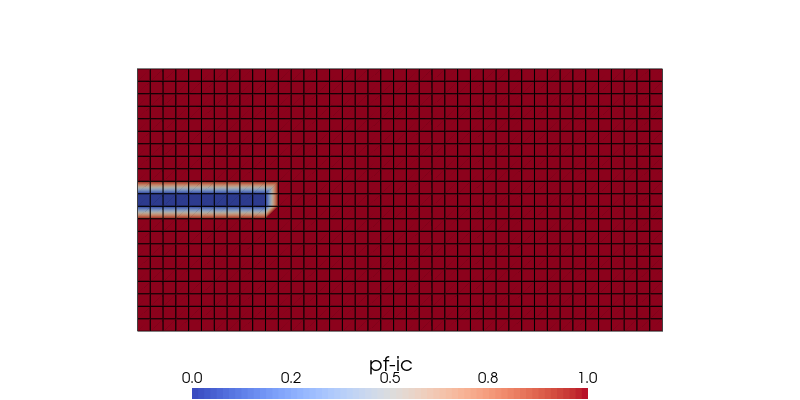

In [34]:
import pyvista as pv

pv.set_plot_theme("document")
pv.set_jupyter_backend("static")

import numpy as np

mesh = pv.read(f"{out_dir}/surfing_quad_1x2_NR.vtu")
phase_field = np.ones((len(mesh.points), 1))


for node_id, x in enumerate(mesh.points):
    if (
        x[0] < x_tip_Initial + h / 10
        and x[1] < Height / 2 + h
        and x[1] > Height / 2 - h
    ):
        phase_field[node_id] = 0.0

mesh.point_data["pf-ic"] = phase_field
mesh.save(f"{out_dir}/surfing_quad_1x2_NR_pf_ic.vtu")

pf_ic = mesh.point_data["pf-ic"]
sargs = {
    "title": "pf-ic",
    "title_font_size": 20,
    "label_font_size": 15,
    "n_labels": 5,
    "position_x": 0.24,
    "position_y": 0.0,
    "fmt": "%.1f",
    "width": 0.5,
}
clim = [0, 1.0]

p = pv.Plotter(shape=(1, 1), border=False)
p.add_mesh(
    mesh,
    scalars=pf_ic,
    show_edges=True,
    show_scalar_bar=True,
    colormap="coolwarm",
    clim=clim,
    scalar_bar_args=sargs,
)

p.view_xy()
p.camera.zoom(1.5)
p.window_size = [800, 400]
p.show()

# Run the simulation 

In [36]:
import ogstools as ogs

# Change the length scale and phasefield model in project file
model = ogs.Project(
    input_file=prj_name,
    output_file=f"{out_dir}/{prj_name}",
    MKL=True,
    args=f"-o {out_dir}",
)

gml_file = Path("./surfing.gml").resolve()

model.replace_parameter_value(name="ls", value=2 * h)
model.replace_text(phasefield_model, xpath="./processes/process/phasefield_model")
model.replace_text(gml_file, xpath="./geometry")
model.replace_text(Path("./Surfing_python.py").resolve(), xpath="./python_script")
model.write_input()

import time

t0 = time.time()
print(">>> OGS started execution ... <<<")
! ogs {out_dir}/{prj_name} -o {out_dir} -m {out_dir} > {out_dir}/ogs-out.txt
assert _exit_code == 0  # noqa: F821

tf = time.time()
print(">>> OGS terminated execution  <<< Elapsed time: ", round(tf - t0, 2), " s.")

>>> OGS started execution ... <<<
>>> OGS terminated execution  <<< Elapsed time:  11.77  s.


# Results

We computed the energy release rate using $G_{\theta}$ method (Destuynder _et al._, 1983; Li _et al._, 2016)  and plot the errors against the theoretical numerical toughness i.e. $(G_c^{\text{eff}})_{\texttt{num}}=G_c(1+\frac{h}{2\ell})$ for $\texttt{AT}_2$,
and $(G_c^{\text{eff}})_{\texttt{num}}=G_c(1+\frac{3h}{8\ell})$ for $\texttt{AT}_1$ (Bourdin _et al._, 2008).

![Alt text](./figures/surfing_gtheta_schematic.png#one-half "Phase field and $\theta$ profile  for the volumetric deviatoric $\texttt{AT}_2$ models.  We use virtual perturbation of $\theta$ to compute energy release rate using $G_{\theta}$ Dubois et al., 1998. The  $\theta$ value is 1 inside of $B_{r_{in}}(P)$,  0 outside, and a linear interpolation in between. We set $r_{in}=4\ell$ and $r_{out}=2.5r_{in}$ (see Li et al., 2016).")

We computed the energy release rate using $G_{\theta}$ method (Destuynder _et al._, 1983; Li _et al._, 2016)  and plot the errors against the theoretical numerical toughness i.e. $(G_c^{\text{eff}})_{\texttt{num}}=G_c(1+\frac{h}{2\ell})$ for $\texttt{AT}_2$,
and $(G_c^{\text{eff}})_{\texttt{num}}=G_c(1+\frac{3h}{8\ell})$ for $\texttt{AT}_1$ (Bourdin _et al._, 2008).

![Alt text](./figures/surfing_gtheta_schematic.png#one-half "Phase field and $\theta$ profile  for the volumetric deviatoric $\texttt{AT}_2$ models.  We use virtual perturbation of $\theta$ to compute energy release rate using $G_{\theta}$ Dubois et al., 1998. The  $\theta$ value is 1 inside of $B_{r_{in}}(P)$,  0 outside, and a linear interpolation in between. We set $r_{in}=4\ell$ and $r_{out}=2.5r_{in}$ (see Li et al., 2016).")

In [37]:
R_inn = 4 * ls
R_out = 2.5 * R_inn

if phasefield_model == "AT1":
    G_eff = G_i * (1 + 3 * h / (8 * ls))
elif phasefield_model == "AT2":
    G_eff = G_i * (1 + h / (2 * ls))

We run the simulation with a coarse mesh here to reduce computing time; however, a finer mesh would give a more accurate results. The energy release rate and its error for Models $\texttt{AT}_1$ and $\texttt{AT}_2$ with a mesh size of $h=0.005$ are shown below.

![Alt text](./figures/surfing_gtheta_ref.png#one-half)
![Alt text](./figures/surfing_gtheta_error_ref.png#one-half)

# Post-processing

In [38]:
from scipy.spatial import Delaunay

reader = pv.get_reader(f"{out_dir}/surfing.pvd")
G_theta_time = np.zeros((len(reader.time_values), 2))


for t, time_value in enumerate(reader.time_values):
    reader.set_active_time_value(time_value)

    mesh = reader.read()[0]
    points = mesh.point_data["phasefield"].shape[0]
    xs = mesh.points[:, 0]
    ys = mesh.points[:, 1]
    pf = mesh.point_data["phasefield"]
    sigma = mesh.point_data["sigma"]
    disp = mesh.point_data["displacement"]

    num_points = disp.shape
    theta = np.zeros(num_points)

    # --------------------------------------------------------------------------------
    # find fracture tip
    # --------------------------------------------------------------------------------
    min_pf = min(pf[:])
    coord_pf_0p5 = mesh.points[pf < 0.5]
    if min_pf <= 0.5:
        coord_pf_0p5[np.argmax(coord_pf_0p5, axis=0)[0]][1]
        x0 = coord_pf_0p5[np.argmax(coord_pf_0p5, axis=0)[0]][0]
        y0 = coord_pf_0p5[np.argmax(coord_pf_0p5, axis=0)[0]][1]
    else:
        x0 = x_tip_Initial
        y0 = y_tip_Initial
    Crack_position = [x0, y0]
    # --------------------------------------------------------------------------------
    # define \theta
    # --------------------------------------------------------------------------------
    for i, x in enumerate(mesh.points):
        # distance from the crack tip
        R = np.sqrt((x[0] - Crack_position[0]) ** 2 + (x[1] - Crack_position[1]) ** 2)
        if R_inn > R:
            theta_funct = 1.0
        elif R_out < R:
            theta_funct = 0.0
        else:
            theta_funct = (R - R_out) / (R_inn - R_out)
        theta[i][0] = theta_funct * np.cos(Orientation)
        theta[i][1] = theta_funct * np.sin(Orientation)

    mesh.point_data["theta"] = theta

    # --------------------------------------------------------------------------------
    # define grad \theta
    # --------------------------------------------------------------------------------
    mesh_theta = mesh.compute_derivative(scalars="theta")
    mesh_theta["gradient"]

    keys = np.array(
        ["thetax_x", "thetax_y", "thetax_z", "thetay_x", "thetay_y", "thetay_z"]
    )
    keys = keys.reshape((2, 3))[:, : mesh_theta["gradient"].shape[1]].ravel()
    gradients_theta = dict(zip(keys, mesh_theta["gradient"].T))
    mesh.point_data.update(gradients_theta)
    # --------------------------------------------------------------------------------
    # define grad u
    # --------------------------------------------------------------------------------
    mesh_u = mesh.compute_derivative(scalars="displacement")
    mesh_u["gradient"]

    keys = np.array(["Ux_x", "Ux_y", "Ux_z", "Uy_x", "Uy_y", "Uy_z"])
    keys = keys.reshape((2, 3))[:, : mesh_u["gradient"].shape[1]].ravel()
    gradients_u = dict(zip(keys, mesh_u["gradient"].T))
    mesh.point_data.update(gradients_u)

    # --------------------------------------------------------------------------------
    # define G_theta
    # --------------------------------------------------------------------------------
    G_theta_i = np.zeros(num_points[0])
    sigma = mesh.point_data["sigma"]
    Ux_x = mesh.point_data["Ux_x"]
    Ux_y = mesh.point_data["Ux_y"]
    Uy_x = mesh.point_data["Uy_x"]
    Uy_y = mesh.point_data["Uy_y"]

    thetax_x = mesh.point_data["thetax_x"]
    thetax_y = mesh.point_data["thetax_y"]
    thetay_x = mesh.point_data["thetay_x"]
    thetay_y = mesh.point_data["thetay_y"]

    for i, _x in enumerate(mesh.points):
        # ---------------------------------------------------------------------------
        sigma_xx = sigma[i][0]
        sigma_yy = sigma[i][1]
        sigma_xy = sigma[i][3]

        Ux_x_i = Ux_x[i]
        Ux_y_i = Ux_y[i]
        Uy_x_i = Uy_x[i]
        Uy_y_i = Uy_y[i]

        thetax_x_i = thetax_x[i]
        thetax_y_i = thetax_y[i]
        thetay_x_i = thetay_x[i]
        thetay_y_i = thetay_y[i]
        # ---------------------------------------------------------------------------
        dUdTheta_11 = Ux_x_i * thetax_x_i + Ux_y_i * thetay_x_i
        dUdTheta_12 = Ux_x_i * thetax_y_i + Ux_y_i * thetay_y_i
        dUdTheta_21 = Uy_x_i * thetax_x_i + Uy_y_i * thetay_x_i
        dUdTheta_22 = Uy_x_i * thetax_y_i + Uy_y_i * thetay_y_i
        trace_sigma_grad_u_grad_theta = (
            sigma_xx * dUdTheta_11
            + sigma_xy * (dUdTheta_12 + dUdTheta_21)
            + sigma_yy * dUdTheta_22
        )
        trace_sigma_grad_u = (
            sigma_xx * Ux_x_i + sigma_xy * (Uy_x_i + Ux_y_i) + sigma_yy * Uy_y_i
        )
        div_theta_i = thetax_x_i + thetay_y_i
        G_theta_i[i] = (
            trace_sigma_grad_u_grad_theta - 0.5 * trace_sigma_grad_u * div_theta_i
        )
    mesh.point_data["G_theta_node"] = G_theta_i
    # --------------------------------------------------------------------------------
    # Integral G_theta
    # --------------------------------------------------------------------------------
    X = mesh.points[:, 0]
    Y = mesh.points[:, 1]
    G_theta_i = mesh.point_data["G_theta_node"]

    domain_points = np.array(list(zip(X, Y)))
    tri = Delaunay(domain_points)

    def area_from_3_points(x, y, z):
        return np.sqrt(np.sum(np.cross(x - y, x - z), axis=-1) ** 2) / 2

    G_theta = 0
    for vertices in tri.simplices:
        mean_value = (
            G_theta_i[vertices[0]] + G_theta_i[vertices[1]] + G_theta_i[vertices[2]]
        ) / 3
        area = area_from_3_points(
            domain_points[vertices[0]],
            domain_points[vertices[1]],
            domain_points[vertices[2]],
        )
        G_theta += mean_value * area
    G_theta_time[t][1] = G_theta
    G_theta_time[t][0] = time_value
mesh.save(f"{out_dir}/surfing_Post_Processing.vtu")

## Plots

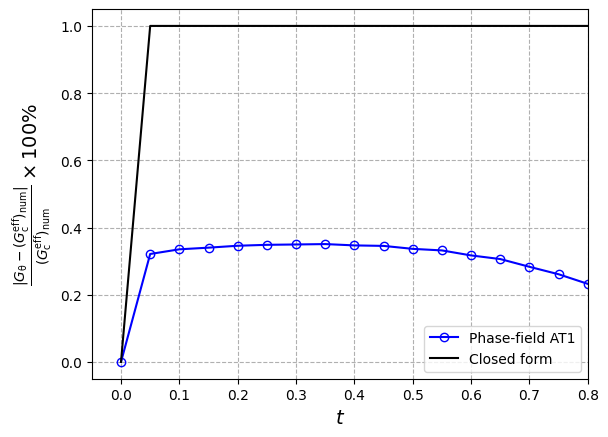

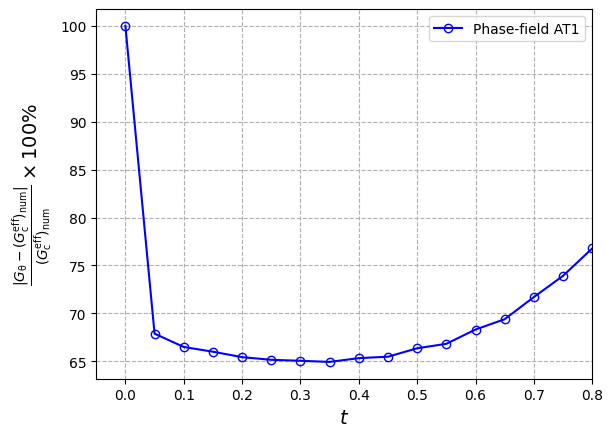

In [39]:
import matplotlib.pyplot as plt

plt.xlabel("$t$", fontsize=14)
plt.ylabel(
    r"$\frac{|{G}_\mathrm{\theta}-({G}_\mathrm{c}^{\mathrm{eff}})_\mathrm{num}|}{({G}_\mathrm{c}^{\mathrm{eff}})_\mathrm{num}}\times 100\%$",
    fontsize=14,
)
plt.plot(
    G_theta_time[:, 0],
    abs(G_theta_time[:, 1]) / G_eff,
    "-ob",
    fillstyle="none",
    linewidth=1.5,
    label=f"Phase-field {phasefield_model}",
)
plt.plot(
    G_theta_time[:, 0],
    np.append(0, np.ones(len(G_theta_time[:, 0]) - 1)),
    "-k",
    fillstyle="none",
    linewidth=1.5,
    label="Closed form",
)
plt.grid(linestyle="dashed")
plt.xlim(-0.05, 0.8)
legend = plt.legend(loc="lower right")
plt.show()

plt.xlabel("$t$", fontsize=14)
plt.ylabel(
    r"$\frac{|{G}_\mathrm{\theta}-({G}_\mathrm{c}^{\mathrm{eff}})_\mathrm{num}|}{({G}_\mathrm{c}^{\mathrm{eff}})_\mathrm{num}}\times 100\%$",
    fontsize=14,
)
plt.plot(
    G_theta_time[:, 0],
    abs(G_theta_time[:, 1] - G_eff) / G_eff * 100,
    "-ob",
    fillstyle="none",
    linewidth=1.5,
    label=f"Phase-field {phasefield_model}",
)
plt.grid(linestyle="dashed")
plt.xlim(-0.05, 0.8)
# plt.ylim(0,4)
legend = plt.legend(loc="upper right")
plt.show()

Hint: Accurate results can be obtained by using the mesh size below 0.02.

## Phase field profile 

### Fracture propagation animation

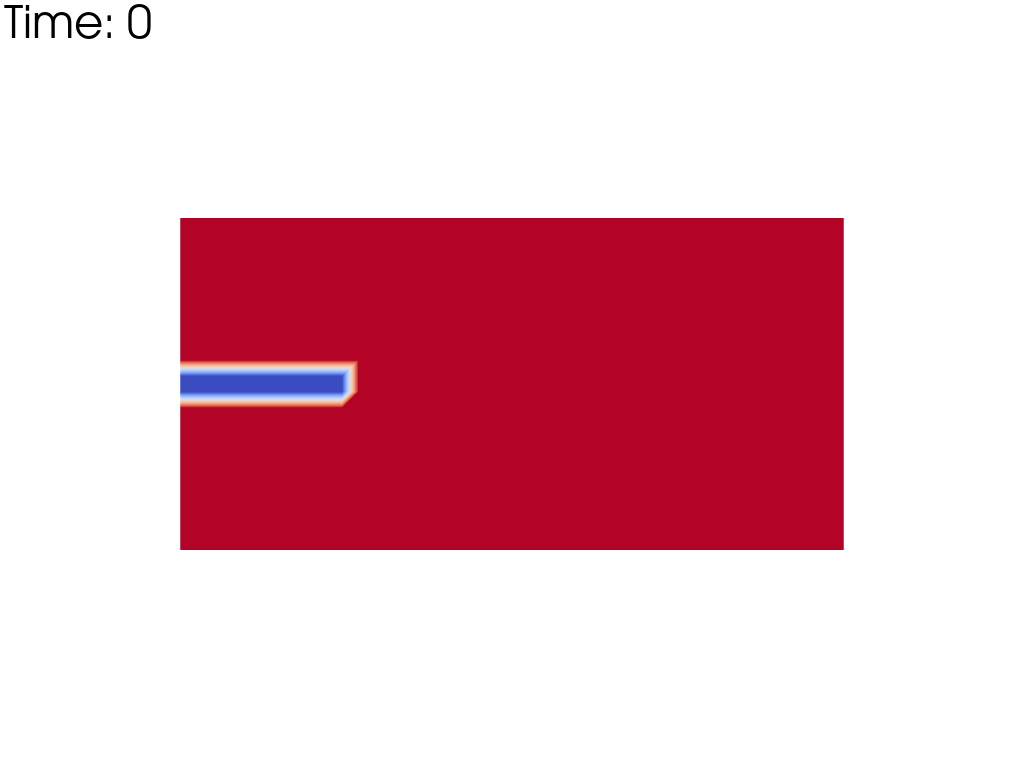

In [40]:
plotter = pv.Plotter()

plotter.open_gif("figures/surfing.gif")
pv.set_plot_theme("document")
for time_value in reader.time_values:
    reader.set_active_time_value(time_value)
    mesh = reader.read()[0]  # This dataset only has 1 block

    sargs = {
        "title": "Phase field",
        "title_font_size": 20,
        "label_font_size": 15,
        "n_labels": 5,
        "position_x": 0.3,
        "position_y": 0.2,
        "fmt": "%.1f",
        "width": 0.5,
    }
    clim = [0, 1.0]
    points = mesh.point_data["phasefield"].shape[0]
    xs = mesh.points[:, 0]
    ys = mesh.points[:, 1]
    pf = mesh.point_data["phasefield"]
    plotter.clear()
    plotter.add_mesh(
        mesh,
        scalars=pf,
        show_scalar_bar=False,
        colormap="coolwarm",
        clim=clim,
        scalar_bar_args=sargs,
        lighting=False,
    )
    plotter.add_text(f"Time: {time_value:.0f}", color="black")

    plotter.view_xy()
    plotter.write_frame()

plotter.close()

![](./figures/surfing.gif)

### Phase field profile at last time step

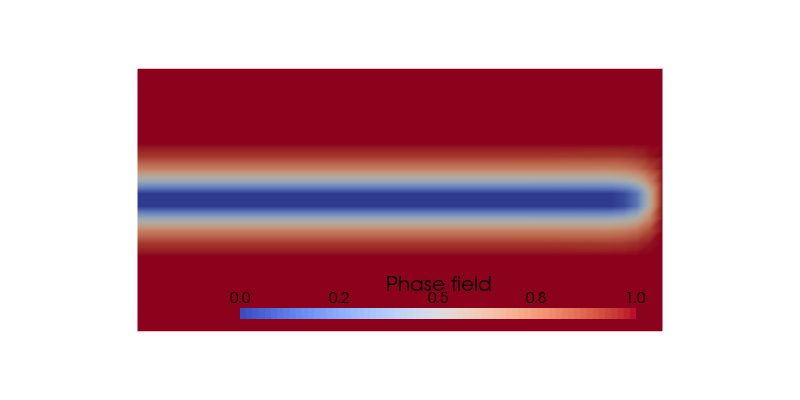

In [41]:
mesh = reader.read()[0]

pv.set_jupyter_backend("static")
p = pv.Plotter(shape=(1, 1), border=False)
p.add_mesh(
    mesh,
    scalars=pf,
    show_edges=False,
    show_scalar_bar=True,
    colormap="coolwarm",
    clim=clim,
    scalar_bar_args=sargs,
)

p.view_xy()
p.camera.zoom(1.5)
p.window_size = [800, 400]
p.show()

## References

[1] B. Bourdin,  G.A. Francfort,  and J.-J. Marigo, _The  variational  approach  to  fracture_,  Journal of Elasticity **91** (2008), no. 1-3, 5–148.

[2]  Li, Tianyi, Jean-Jacques Marigo, Daniel Guilbaud, and Serguei Potapov. _Numerical investigation of dynamic brittle fracture via gradient damage models._ Advanced Modeling and Simulation in Engineering Sciences **3**, no. 1 (2016): 1-24.

[3]  Dubois, Frédéric and Chazal, Claude and
Petit, Christophe, _A  Finite  Element  Analysis  of  Creep-Crack  Growth  in Viscoelastic Media_, Mechanics Time-Dependent Materials **2** (1998), no. 3, 269–286